# 1. Basic preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "../../Datasets/Beijing_House_Price_Dataset/beijing.csv"
df = pd.read_csv(path, encoding="gbk", low_memory=False)
len(df.columns)

26

In [3]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [4]:
df.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

In [5]:
df.drop(['DOM','url','Cid','id'],axis=1,inplace=True)

In [6]:
for row in range(df.shape[1]):
    # find string object in csv file
    if(df.iloc[:,row].dtype=="O"):
        print("{}: {}\n".format(df.columns[row],df.iloc[:,row].unique()))

tradeTime: ['2016-08-09' '2016-07-28' '2016-12-11' ... '2012-01-28' '2011-01-30'
 '2009-01-11']

livingRoom: ['2' '3' '1' '4' '5' '6' '9' '0' '7' '8' '#NAME?']

drawingRoom: ['1' '2' '0' '4' '3' '5' '中 14' '中 15' '中 16' '中 6' '高 14' '顶 6' '低 6'
 '低 16' '高 12' '低 15' '高 6' '底 28' '底 11' '中 24' '底 20' '中 22']

bathRoom: ['1' '2' '3' '0' '4' '5' '6' '7' '2006' '2003' '1990' '2000' '1996' '2005'
 '2011' '未知' '1994' '2004']

floor: ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低 12' '中 10' '中 16' '顶 20' '底 19' '中 31' '低 13'
 '底 10' '高 25' '中 21' '中 20' '高 20' '低 21' '低 24' '顶 4' '高 21'

In [7]:
from math import radians, cos, sin, asin, sqrt

def distance(lat2, lon2,lat1=39.916668,lon1=116.383331): 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
    r = 6371 # Radius of earth in kilometers
    return(c * r) 

# drop "未知" data, add a new attribute distance
df = df[df['constructionTime']!='未知']
df['distance'] = df.apply(lambda x: distance (x['Lat'],x['Lng']),axis=1)

In [8]:
df['constructionTime'] = df['constructionTime'].astype(int)
# add age attribute
df['age'] = 2025 - df['constructionTime']

In [ ]:
# convert trade time into year+month, as the time interval size is one month
df['tradeTime'] = pd.to_datetime(df['tradeTime'])
# df['tradeTime'] = df['tradeTime'].dt.strftime('%Y-%m')
df = df[df['tradeTime'] >= '2012-01-01']
df = df.sort_values(by='tradeTime')
df['month'] = df['tradeTime'].dt.year * 12 + df['tradeTime'].dt.month
df['day'] = df['tradeTime'].dt.year * 356 + df['tradeTime'].dt.month * 30 + df['tradeTime'].dt.day

In [26]:
df["month"].unique()

array([24145., 24146., 24147., 24148., 24149., 24150., 24151., 24152.,
       24153., 24154., 24155., 24156., 24157., 24158., 24159., 24160.,
       24161., 24162., 24163., 24164., 24165., 24166., 24167., 24168.,
       24169., 24170., 24171., 24172., 24173., 24174., 24175., 24176.,
       24177., 24178., 24179., 24180., 24181., 24182., 24183., 24184.,
       24185., 24186., 24187., 24188., 24189., 24190., 24191., 24192.,
       24193., 24194., 24195., 24196., 24197., 24198., 24199., 24200.,
       24201., 24202., 24203., 24204., 24205., 24206., 24207., 24208.,
       24209., 24210., 24211., 24212., 24213., 24214., 24215., 24216.,
       24217.])

In [11]:
# convert floor attribute

lst_numeric = []
lst_str = []
for value in df['floor'].values:
    value = value.split()
    try:
        numeric = (value[1])
        string  = value[0]
    except:
        numeric = np.nan
        string = np.nan
    lst_numeric.append(numeric)
    lst_str.append(string)

# Replacing Chinese language words with English words.    
lst_str_eng=[]
for string in lst_str:
    if string == '中':
        lst_str_eng.append(string.replace('中','2'))
    elif string == '高':
        lst_str_eng.append(string.replace('高','3'))
    elif string == '底':
        lst_str_eng.append(string.replace('底','0'))
    elif string == '低':
        lst_str_eng.append(string.replace('低','1'))
    elif string == '未知':
        lst_str_eng.append(string.replace('未知','-1'))
    elif string == '顶':
        lst_str_eng.append(string.replace('顶','4'))

df2 = pd.DataFrame(lst_str_eng,columns=['floorType'])
df3 = pd.DataFrame(lst_numeric,columns=['floorHeight'])
df = pd.concat([df,df2,df3],axis=1)

# Deleting unknown values
df = df[df['floorType']!='unknown']
df.dropna(inplace=True)

In [12]:
# drop floor column
df.drop('floor', axis=1, inplace=True)

In [13]:
# # Converting 'buildingType' feature to object or string type
# df['buildingType'].replace(1,'Tower',inplace=True)
# df['buildingType'].replace(2,'Bungalow',inplace=True)
# df['buildingType'].replace(3,'Tower and Plate',inplace=True)
# df['buildingType'].replace(4,'Plate',inplace=True)

In [14]:
df.isnull().sum()

Lng                    0
Lat                    0
tradeTime              0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
distance               0
age                    0
month                  0
floorType              0
floorHeight            0
dtype: int64

In [ ]:
# Get columns with int64 dtype
int_columns = df.select_dtypes(include=['int64', 'int32']).columns

# Convert int64 to float64
df[int_columns] = df[int_columns].astype('float64')

# Verify conversion
print("Column dtypes after conversion:")
print(df.dtypes)

In [16]:
for col in df.columns:
    print(col)
    print(df[col].min(), df[col].max())
    print(df[col].mean())
    print('------------------------')

Lng
116.072514 116.711337
116.42208601005404
------------------------
Lat
39.62703 40.252758
39.95320361310766
------------------------
tradeTime
2012-01-01 00:00:00 2018-01-28 00:00:00
2015-06-10 14:45:40.408735232
------------------------
followers
0.0 1143.0
18.216283392008545
------------------------
totalPrice
0.1 4900.0
351.37970233303525
------------------------
price
1.0 150000.0
43453.335012594456
------------------------
square
7.8 640.0
83.71239476486018
------------------------
livingRoom
0.0 8.0
2.0199841966441983
------------------------
drawingRoom
0.0 5.0
1.181215522901882
------------------------
kitchen
0.0 3.0
0.9957857717861873
------------------------
bathRoom
0.0 7.0
1.189721883196136
------------------------
buildingType
1.0 4.0
3.0370562725596613
------------------------
constructionTime
1950.0 2016.0
1999.6044190040918
------------------------
renovationCondition
1.0 4.0
2.6631436806980187
------------------------
buildingStructure
1.0 6.0
4.462062671805849
---

remove outliers

In [17]:
from scipy import stats


def remove_outliers_fitted(df, col: str):
    shape, loc, scale = stats.invgauss.fit(df[col], floc=0)
    
    lower = stats.invgauss.ppf(0.01, shape, loc, scale)
    upper = stats.invgauss.ppf(0.99, shape, loc, scale)
    print("lower: ", lower)
    print("upper: ", upper)
    
    df_filtered = df[(df[col] >= lower) & (df[col] <= upper)]
    return df_filtered


cols = ["totalPrice", "price", "square", "communityAverage"]
for col in cols:
    print("before: ", len(df))
    df = remove_outliers_fitted(df, col)
    print("after: ", len(df))
    print("--------------------------")


before:  269563
lower:  60.44445327009297
upper:  1483.4854709865958
after:  267612
--------------------------
before:  267612
lower:  18235.166638101764
upper:  100989.37169397065
after:  249138
--------------------------
before:  249138
lower:  41.33615442495492
upper:  167.164401755236
after:  233989
--------------------------
before:  233989
lower:  36482.04638107836
upper:  103738.07234712612
after:  220094
--------------------------


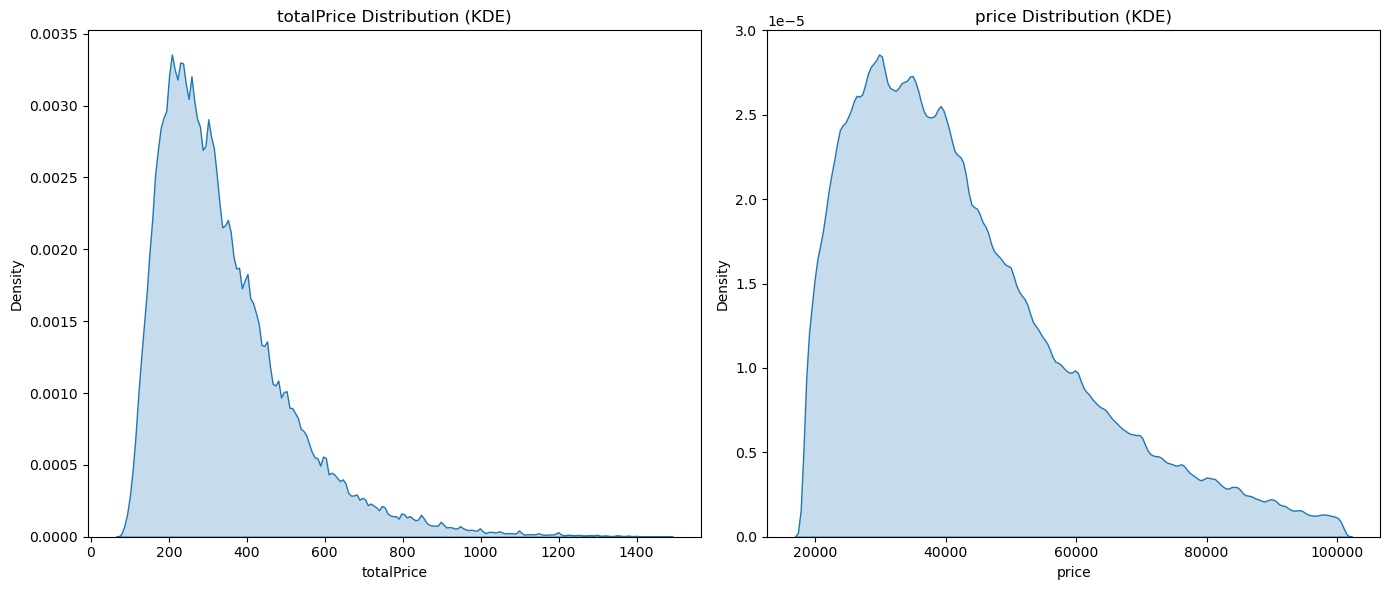

In [18]:
def plot_kde_distributions(
        df: pd.DataFrame,
        columns: list,
        bw_adjust: float = 0.3, 
        figsize: tuple = (14, 6)
    ) -> None:
    for i in range(0, len(columns), 2):
        plt.figure(figsize=figsize)
        
        # First subplot
        plt.subplot(1, 2, 1)
        sns.kdeplot(data=df, x=columns[i], bw_adjust=bw_adjust, fill=True)
        plt.title(f'{columns[i]} Distribution (KDE)')
        plt.xlabel(columns[i])
        print(df[columns[i]].min())
        print(df[columns[i]].max())
        
        # Second subplot (if available)
        if i + 1 < len(columns):
            plt.subplot(1, 2, 2)
            sns.kdeplot(data=df, x=columns[i+1], bw_adjust=bw_adjust, fill=True)
            plt.title(f'{columns[i+1]} Distribution (KDE)')
            plt.xlabel(columns[i+1])
            print(df[columns[i+1]].min())
            print(df[columns[i+1]].max())
        
        plt.tight_layout()
        plt.show()

In [ ]:
columns_to_plot = ["totalPrice", "price", "square", "communityAverage"]
plot_kde_distributions(df, columns_to_plot)

In [19]:
df["totalPrice"].min(), df["totalPrice"].max()

(77.5, 1480.0)

In [20]:
df["price"].min(), df["price"].max()

(18236.0, 100986.0)

In [22]:
df["square"].min(), df["square"].max()

(41.34, 167.15)

In [23]:
df["communityAverage"].min(), df["communityAverage"].max()

(36508.0, 103730.0)

In [24]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [25]:
saved_path = "../../Datasets/Beijing_House_Price_Dataset/processed_beijing.csv"
df.to_csv(saved_path, index=False)